## RMM1

In [1]:
!pwd

/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/deep_CNN


In [2]:
import numpy as np
import pandas as pd

In [3]:
import xarray as xr
import hilbert_data1_jgrjd_20CRV3
import datetime
import matplotlib.pyplot as plt

In [4]:
df = xr.open_dataset('trop_sfc.ano_1905-2015_filtered_rm_mean120.2deg.nc')

In [5]:
df

<xarray.Dataset>
Dimensions:   (lat: 30, lon: 180, time: 40422)
Coordinates:
  * time      (time) datetime64[ns] 1905-05-01 1905-05-02 ... 2015-12-31
  * lon       (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat       (lat) float64 -29.0 -27.0 -25.0 -23.0 ... 23.0 25.0 27.0 29.0
Data variables:
    pres_ano  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Mon Jan 20 23:20:30 2020: cdo -O -sellonlatbox,0,360,-30,30...
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

In [6]:
_,y_train,_ = hilbert_data1_jgrjd_20CRV3.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
_,y_test,_ = hilbert_data1_jgrjd_20CRV3.data_hilbert(datetime.datetime(1974,6,1),datetime.datetime(1978,3,16))
_,y_test2,_ = hilbert_data1_jgrjd_20CRV3.data_hilbert(datetime.datetime(2009,1,1),datetime.datetime(2015,1,1))

In [7]:
y_test.index[0],y_train.index[-1]

(Timestamp('1974-09-28 00:00:00'), Timestamp('2008-12-31 00:00:00'))

In [8]:
df_train = df.sel(time=slice(str(y_train.index[0]),str(y_train.index[-1])),lat=slice(-25,25))
df_test = df.sel(time=slice(str(y_test.index[0]),str(y_test.index[-1])),lat=slice(-25,25))
df_test2 = df.sel(time=slice(str(y_test2.index[0]),str(y_test2.index[-1])),lat=slice(-25,25))

df_test3 = df.sel(lat=slice(-25,25))


In [9]:
x_train = df_train.pres_ano.values[:,:,:]
x_test  = df_test.pres_ano.values[:,:,:]
x_test2  = df_test2.pres_ano.values[:,:,:]

x_test3 = df_test3.pres_ano.values[:,:,:]

In [10]:
ff = x_train.flatten()

(array([2.0000000e+00, 1.0000000e+00, 4.0000000e+00, 4.0000000e+00,
        1.5000000e+01, 2.1000000e+01, 2.6000000e+01, 3.2000000e+01,
        6.7000000e+01, 1.4000000e+02, 2.2500000e+02, 3.7100000e+02,
        6.8200000e+02, 1.1500000e+03, 2.0940000e+03, 4.0830000e+03,
        8.5180000e+03, 1.8280000e+04, 4.3857000e+04, 1.1518500e+05,
        3.4013600e+05, 1.1805730e+06, 5.6656560e+06, 2.0502651e+07,
        1.7715220e+07, 4.1380890e+06, 7.8104800e+05, 1.6396800e+05,
        3.4470000e+04, 7.3640000e+03, 1.6850000e+03, 5.6100000e+02,
        2.3800000e+02, 8.9000000e+01, 1.5000000e+01]),
 array([-3403.639   , -3261.1016  , -3118.5642  , -2976.0269  ,
        -2833.4893  , -2690.952   , -2548.4146  , -2405.8772  ,
        -2263.3398  , -2120.8025  , -1978.265   , -1835.7277  ,
        -1693.1903  , -1550.653   , -1408.1155  , -1265.5781  ,
        -1123.0408  ,  -980.50336 ,  -837.966   ,  -695.4286  ,
         -552.89124 ,  -410.35382 ,  -267.81644 ,  -125.27906 ,
           17.258

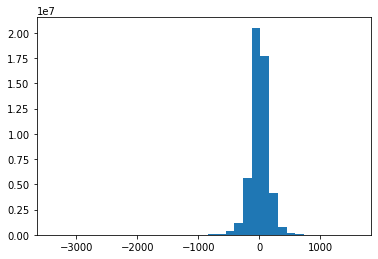

In [11]:
plt.hist(ff,bins=35)

In [12]:
df

<xarray.Dataset>
Dimensions:   (lat: 30, lon: 180, time: 40422)
Coordinates:
  * time      (time) datetime64[ns] 1905-05-01 1905-05-02 ... 2015-12-31
  * lon       (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat       (lat) float64 -29.0 -27.0 -25.0 -23.0 ... 23.0 25.0 27.0 29.0
Data variables:
    pres_ano  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.7.1 (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Mon Jan 20 23:20:30 2020: cdo -O -sellonlatbox,0,360,-30,30...
    CDO:          Climate Data Operators version 1.9.7.1 (http://mpimet.mpg.d...

In [13]:
y_train.index[0],y_train.index[-1]

(Timestamp('1979-04-30 00:00:00'), Timestamp('2008-12-31 00:00:00'))

In [14]:
df.pres_ano[27027,1,10],df.pres_ano[37865,1,10]

(<xarray.DataArray 'pres_ano' ()>
 array(-314.896912)
 Coordinates:
     time     datetime64[ns] 1979-04-30
     lon      float64 20.0
     lat      float64 -27.0
 Attributes:
     standard_name:     air_pressure
     long_name:         daily mean 3-hourly Pressure at Surface
     units:             Pa
     GRIB_name:         PRES
     var_desc:          Pressure
     level_desc:        Surface
     statistic:         Mean
     parent_stat:       Individual Obs
     statistic_method:  Ensemble mean is calculated by averaging over all 80 e...
     GridType:          Cylindrical Equidistant Projection Grid
     datum:             wgs84
     dataset:           NOAA/CIRES/DOE 20th Century Reanalysis version 3si Dai...
     actual_range:      [ 51448.953 104290.52 ],
 <xarray.DataArray 'pres_ano' ()>
 array(-210.264709)
 Coordinates:
     time     datetime64[ns] 2008-12-31
     lon      float64 20.0
     lat      float64 -27.0
 Attributes:
     standard_name:     air_pressure
     long_name

In [15]:
y_test.index[0],y_test.index[-1]

(Timestamp('1974-09-28 00:00:00'), Timestamp('1978-03-16 00:00:00'))

In [16]:
df.pres_ano[25352,1,10],df.pres_ano[26617,1,10]

(<xarray.DataArray 'pres_ano' ()>
 array(-77.605286)
 Coordinates:
     time     datetime64[ns] 1974-09-28
     lon      float64 20.0
     lat      float64 -27.0
 Attributes:
     standard_name:     air_pressure
     long_name:         daily mean 3-hourly Pressure at Surface
     units:             Pa
     GRIB_name:         PRES
     var_desc:          Pressure
     level_desc:        Surface
     statistic:         Mean
     parent_stat:       Individual Obs
     statistic_method:  Ensemble mean is calculated by averaging over all 80 e...
     GridType:          Cylindrical Equidistant Projection Grid
     datum:             wgs84
     dataset:           NOAA/CIRES/DOE 20th Century Reanalysis version 3si Dai...
     actual_range:      [ 51448.953 104290.52 ],
 <xarray.DataArray 'pres_ano' ()>
 array(74.887344)
 Coordinates:
     time     datetime64[ns] 1978-03-16
     lon      float64 20.0
     lat      float64 -27.0
 Attributes:
     standard_name:     air_pressure
     long_name:  

In [17]:
x_train.shape,x_test3.shape,x_test.shape

((10839, 26, 180), (40422, 26, 180), (1266, 26, 180))

In [18]:
x_test3_ = x_test3.copy()
x_test3_ = x_test3_.reshape(x_test3_.shape[0],x_test3_.shape[1]*x_test3_.shape[2])

In [19]:
from sklearn.preprocessing import MinMaxScaler
xtest3 = x_test3.copy()
#xtrain  = 
scalers = {}
for i in range(xtest3.shape[0]):
    scalers = MinMaxScaler()
    ff = xtest3[i,:,:].reshape(26*180,1)
    scalers.fit(ff)
    xtest3[i,:,:] = np.reshape(scalers.fit_transform(ff),(26,180))
    #xtrain[i,:,:] = scalers[i].fit_transform(xtrain[:, i, :]) 

#for i in range(xtest.shape[1]):
#    xtest[:, i, :] = scalers[i].transform(xtest[:, i, :]) 

(array([  137516.,   122466.,   171443.,   245845.,   352165.,   503740.,
          723067.,  1054778.,  1512104.,  2132549.,  2947665.,  3915622.,
         5122327.,  6530521.,  8013879.,  9551170., 11021248., 12408771.,
        13389579., 13919640., 14031313., 13714353., 12917899., 11751742.,
        10353884.,  8811229.,  7173612.,  5545222.,  4103894.,  2853788.,
         1836091.,  1100394.,   609390.,   340220.,   255834.]),
 array([0.        , 0.02857143, 0.05714286, 0.0857143 , 0.11428573,
        0.14285716, 0.17142859, 0.20000002, 0.22857146, 0.2571429 ,
        0.28571433, 0.31428576, 0.34285718, 0.3714286 , 0.40000004,
        0.4285715 , 0.45714292, 0.48571435, 0.5142858 , 0.5428572 ,
        0.57142866, 0.6000001 , 0.6285715 , 0.65714294, 0.68571436,
        0.7142858 , 0.7428572 , 0.77142864, 0.8000001 , 0.8285715 ,
        0.857143  , 0.8857144 , 0.91428584, 0.94285727, 0.9714287 ,
        1.0000001 ], dtype=float32),
 <a list of 35 Patch objects>)

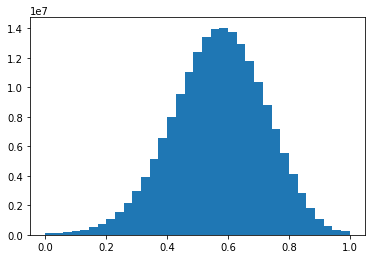

In [20]:
plt.hist(xtest3.flatten(),bins=35)

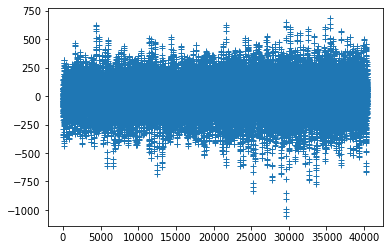

In [21]:
plt.plot(x_test3_.reshape(40422,26*180)[:,1],'+')

In [22]:
xtrain = xtest3[27027:37866,:,:,None]
xtest  = xtest3[25352:26618,:,:,None]
xtest3 = xtest3[:,:,:,None]

In [23]:
xtrain.shape,xtest.shape,y_train.shape,y_test.shape

((10839, 26, 180, 1), (1266, 26, 180, 1), (10839, 1), (1266, 1))

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,AveragePooling2D

model = Sequential()

model.add(Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=(xtrain.shape[1],xtrain.shape[2],1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=1, activation = 'linear'))

xtrain.shape,y_train.shape

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='mae')

history = model.fit(xtrain, y_train.values, validation_data=(xtest, y_test.values), epochs=3)

In [25]:
batch_size =100
#num_classes = 10
epochs = 60
data_augmentation = True

In [26]:
import keras
#from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os


model = Sequential()
model.add(Conv2D(64*2, (3, 3), padding='same',
                 input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64*2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64*2, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('linear'))

# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='mae',optimizer=opt)

Using TensorFlow backend.


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 180, 128)      1280      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 180, 128)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 178, 128)      147584    
_________________________________________________________________
activation_2 (Activation)    (None, 24, 178, 128)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 89, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 89, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 89, 128)      

In [28]:
xtrain1 = xtrain.astype('float32')
xtest1 = xtest.astype('float32')
xtest3 = xtest3.astype('float32')

ytrain1 = y_train.values.astype('float32')
ytest1  = y_test.values.astype('float32')

In [29]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(xtrain1, ytrain1,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(xtest1, ytest1),
              shuffle=False)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(xtrain1)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(xtrain1, ytrain1,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(xtest1, ytest1),
                        workers=4)

Using real-time data augmentation.
Epoch 1/60
109/109 [==============================] - 172s 2s/step - loss: 0.7480 - val_loss: 0.6130
Epoch 2/60
109/109 [==============================] - 168s 2s/step - loss: 0.6490 - val_loss: 0.6067
Epoch 3/60
109/109 [==============================] - 170s 2s/step - loss: 0.6262 - val_loss: 0.5502
Epoch 4/60
109/109 [==============================] - 172s 2s/step - loss: 0.6019 - val_loss: 0.5571
Epoch 5/60
109/109 [==============================] - 169s 2s/step - loss: 0.5892 - val_loss: 0.5362
Epoch 6/60
109/109 [==============================] - 173s 2s/step - loss: 0.5830 - val_loss: 0.5330
Epoch 7/60
109/109 [==============================] - 173s 2s/step - loss: 0.5748 - val_loss: 0.5344
Epoch 8/60
109/109 [==============================] - 227s 2s/step - loss: 0.5651 - val_loss: 0.5010
Epoch 9/60
109/109 [==============================] - 241s 2s/step - loss: 0.5599 - val_loss: 0.4974
Epoch 10/60
109/109 [==============================] - 2

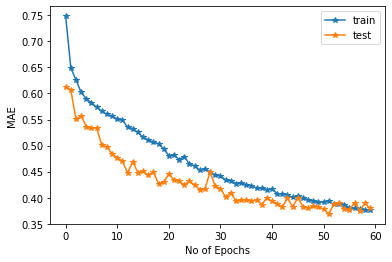

In [43]:
#model.history.keys()

plt.plot(model.history.history['loss'],'-*',label ='train')
plt.plot(model.history.history['val_loss'],'-*',label ='test')
plt.ylabel('MAE')
plt.xlabel('No of Epochs')
plt.legend()
# plt.savefig('RMM2_history.png')

## Correlation

In [44]:
yy_test = model.predict(xtest)

In [45]:
yy_test.shape,y_test.shape

((1266, 1), (1266, 1))

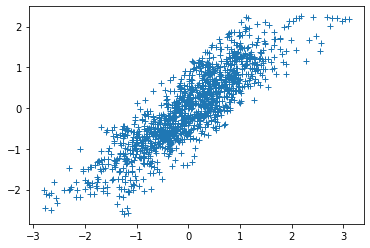

In [46]:
plt.plot(yy_test,y_test,'+')

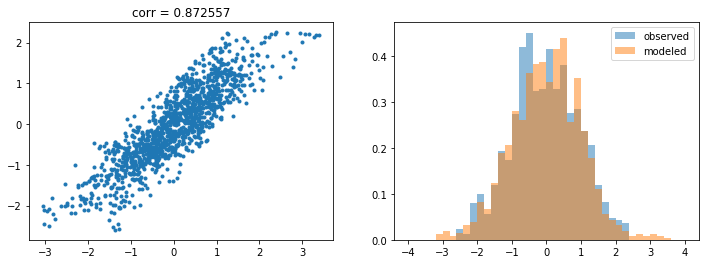

In [47]:
yy_test = model.predict(xtest)
test_corr = np.corrcoef(yy_test[:,0],y_test.values[:,0])[0,1]
yy_test   = yy_test[:,0]/yy_test[:,0].std()

# print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test,y_test.values[:,0],'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.values[:,0],bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

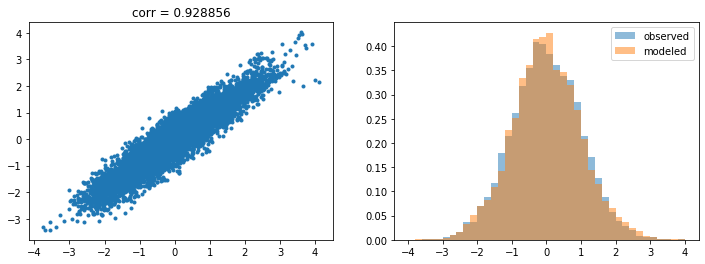

In [48]:
yy_train = model.predict(xtrain)
train_corr = np.corrcoef(yy_train[:,0],y_train.values[:,0])[0,1]
yy_train   = yy_train[:,0]/yy_train[:,0].std()

# print("train shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train,y_train.values[:,0],'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.values[:,0],bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

In [49]:
rmm1 = model.predict(xtest3)

In [50]:
rmm1 = pd.DataFrame(rmm1,index=pd.to_datetime(df_test3.time[:].values),columns=['rmm1'])

(array([7.000e+00, 1.100e+01, 1.000e+01, 2.100e+01, 5.200e+01, 8.900e+01,
        1.500e+02, 3.020e+02, 4.640e+02, 7.030e+02, 1.011e+03, 1.463e+03,
        2.018e+03, 2.638e+03, 3.292e+03, 3.851e+03, 4.281e+03, 4.337e+03,
        3.950e+03, 3.327e+03, 2.577e+03, 1.933e+03, 1.354e+03, 9.400e+02,
        6.230e+02, 4.160e+02, 2.440e+02, 1.820e+02, 9.600e+01, 4.500e+01,
        1.700e+01, 7.000e+00, 6.000e+00, 2.000e+00, 3.000e+00]),
 array([-3.5763633 , -3.364789  , -3.1532147 , -2.9416404 , -2.7300663 ,
        -2.518492  , -2.3069177 , -2.0953434 , -1.883769  , -1.6721948 ,
        -1.4606205 , -1.2490462 , -1.0374719 , -0.82589763, -0.6143234 ,
        -0.4027491 , -0.19117482,  0.02039947,  0.23197375,  0.44354802,
         0.65512234,  0.8666966 ,  1.0782709 ,  1.2898451 ,  1.5014194 ,
         1.7129937 ,  1.924568  ,  2.1361423 ,  2.3477166 ,  2.559291  ,
         2.7708652 ,  2.9824395 ,  3.1940136 ,  3.405588  ,  3.6171622 ,
         3.8287365 ], dtype=float32),
 <a list of 35 P

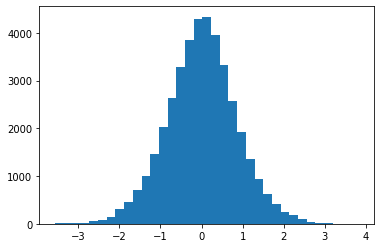

In [51]:
plt.hist(rmm1.rmm1,bins=35)

In [52]:
rmm1.to_csv('deep_CNN_rmm1_minmaxscalar_batchsize_100_woymnmx.csv')

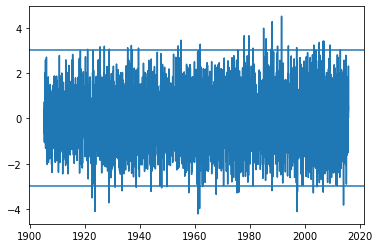

In [53]:
plt.plot(rmm1.rmm1/rmm1.rmm1.std())
plt.axhline(3)
plt.axhline(-3)

In [54]:
model.save("deep_CNN_rmm1_minmaxscalar_batchsize_100_woymnmx.h5")
print("Saved model to disk")

Saved model to disk


In [55]:
rmm1

,rmm1
1905-05-01,-0.367968
1905-05-02,-0.335878
1905-05-03,-0.288336
1905-05-04,-0.277017
1905-05-05,-0.307969
...,...
2015-12-27,0.939337
2015-12-28,0.576719
2015-12-29,0.258167
2015-12-30,0.186237
